In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
df_all_cities = pd.DataFrame()

In [5]:
out_columns = ['year','month','day','hour','season','PM_US Post','DEWP','HUMI','PRES','TEMP','cbwd','Iws','precipitation','Iprec']

In [6]:
file_path = r'C:\Users\janzh\Desktop\PM25'

In [7]:
Beijing = file_path + r'\Beijing.csv'

In [8]:
Shanghai =file_path + r'\Shanghai.csv'

In [9]:
Guangzhou = file_path + r'\Guangzhou.csv'

In [10]:
Chengdu = file_path + r'\Chengdu.csv'

In [11]:
Shenyang = file_path + r'\Shenyang.csv'

In [12]:
file_names = [Beijing,Shanghai,Guangzhou,Chengdu,Shenyang]

In [13]:
for inx,val in enumerate(file_names): #用for循环，将df_all_cities填充各个子df
    df = pd.read_csv(val)
    f_name = val[len(file_path)+1:] 
    df = df[out_columns]
    df['city'] = f_name.split('.')[0] #增加一列‘city’
    df['season'] = df['season'].map({1:'Spring',2:'Summer',3:'Autumn',4:'Winter'}) 
    df_all_cities = df_all_cities.append(df) 

In [14]:
df_all_cities.columns = [c.replace(' ','_') for c in df.columns]

In [15]:
df_all_cities.head()

,year,month,day,hour,season,PM_US_Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,city
0,2010,1,1,0,Winter,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0,Beijing
1,2010,1,1,1,Winter,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0,Beijing
2,2010,1,1,2,Winter,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0,Beijing
3,2010,1,1,3,Winter,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0,Beijing
4,2010,1,1,4,Winter,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0,Beijing


In [16]:
df_all_cities.describe()

,year,month,day,hour,PM_US_Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
count,262920.000000,262920.000000,262920.000000,262920.0000,167358.000000,261680.000000,261352.000000,261339.000000,261682.000000,261677.000000,242708.000000,242708.000000
mean,2012.499772,6.523962,15.726609,11.5000,73.683929,8.606491,67.260260,1013.684178,15.657388,20.967698,4.250454,4.815252
std,1.707472,3.448426,8.798829,6.9222,68.540478,41.148388,45.018485,9.841144,11.341732,47.092075,2029.801803,2029.808291
min,2010.000000,1.000000,1.000000,0.0000,1.000000,-9999.000000,-9999.000000,975.000000,-28.000000,0.000000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,5.7500,29.000000,1.000000,53.000000,1006.000000,8.000000,2.000000,0.000000,0.000000
50%,2012.000000,7.000000,16.000000,11.5000,54.000000,11.200000,71.270000,1013.000000,18.000000,5.000000,0.000000,0.000000
75%,2014.000000,10.000000,23.000000,17.2500,94.000000,19.000000,86.000000,1021.000000,24.400000,18.000000,0.000000,0.000000
max,2015.000000,12.000000,31.000000,23.0000,994.000000,28.000000,100.000000,1046.000000,42.000000,1110.000000,999990.000000,999990.000000


In [17]:
temp_list = df_all_cities[df_all_cities.HUMI < 0].index.tolist()

In [18]:
df_all_cities.drop(axis=0,labels=temp_list,inplace= True)

In [19]:
df_all_cities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262900 entries, 0 to 52583
Data columns (total 15 columns):
year             262900 non-null int64
month            262900 non-null int64
day              262900 non-null int64
hour             262900 non-null int64
season           262899 non-null object
PM_US_Post       167338 non-null float64
DEWP             261660 non-null float64
HUMI             261332 non-null float64
PRES             261319 non-null float64
TEMP             261662 non-null float64
cbwd             261669 non-null object
Iws              261657 non-null float64
precipitation    242688 non-null float64
Iprec            242688 non-null float64
city             262900 non-null object
dtypes: float64(8), int64(4), object(3)
memory usage: 29.1+ MB


In [20]:
df_all_cities.describe()

,year,month,day,hour,PM_US_Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
count,262900.000000,262900.000000,262900.000000,262900.000000,167338.000000,261660.000000,261332.000000,261319.000000,261662.000000,261657.000000,242688.000000,242688.000000
mean,2012.499734,6.523545,15.726740,11.500456,73.684172,8.760489,67.414289,1013.683474,15.658541,20.968318,4.250792,4.815550
std,1.707531,3.448227,8.799151,6.922258,68.543795,12.737207,21.812754,9.841048,11.341027,47.093503,2029.885440,2029.891928
min,2010.000000,1.000000,1.000000,0.000000,1.000000,-97.000000,0.000000,975.000000,-28.000000,0.000000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,6.000000,29.000000,1.000000,53.000000,1006.000000,8.000000,2.000000,0.000000,0.000000
50%,2012.000000,7.000000,16.000000,12.000000,54.000000,11.200000,71.270000,1013.000000,18.000000,5.000000,0.000000,0.000000
75%,2014.000000,10.000000,23.000000,18.000000,94.000000,19.000000,86.000000,1021.000000,24.400000,18.000000,0.000000,0.000000
max,2015.000000,12.000000,31.000000,23.000000,994.000000,28.000000,100.000000,1046.000000,42.000000,1110.000000,999990.000000,999990.000000


In [21]:
df_all_cities['PM_US_Post'].fillna(df_all_cities['PM_US_Post'].mean(),inplace=True)

In [22]:
df_all_cities['HUMI'].fillna(df_all_cities['HUMI'].mean(),inplace=True)

In [23]:
df_all_cities['TEMP'].fillna(df_all_cities['TEMP'].mean(),inplace=True)

In [24]:
df_all_cities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262900 entries, 0 to 52583
Data columns (total 15 columns):
year             262900 non-null int64
month            262900 non-null int64
day              262900 non-null int64
hour             262900 non-null int64
season           262899 non-null object
PM_US_Post       262900 non-null float64
DEWP             261660 non-null float64
HUMI             262900 non-null float64
PRES             261319 non-null float64
TEMP             262900 non-null float64
cbwd             261669 non-null object
Iws              261657 non-null float64
precipitation    242688 non-null float64
Iprec            242688 non-null float64
city             262900 non-null object
dtypes: float64(8), int64(4), object(3)
memory usage: 29.1+ MB


In [25]:
df_all_cities.isnull().sum()

year                 0
month                0
day                  0
hour                 0
season               1
PM_US_Post           0
DEWP              1240
HUMI                 0
PRES              1581
TEMP                 0
cbwd              1231
Iws               1243
precipitation    20212
Iprec            20212
city                 0
dtype: int64

In [26]:
import seaborn as sns

In [27]:
df_PM25_month = df_all_cities.groupby('month',as_index=False).mean().sort_values(['PM_US_Post'],ascending=False).reset_index()

In [28]:
df_PM25_season = df_all_cities.groupby('season',as_index=False).mean().sort_values(['PM_US_Post'],ascending=False).reset_index()

In [29]:
def univariate_plot(data, key = '', color = ''):
    """
    Plot average PM 2.5 readings, given a feature of interest
    """
    
    # Check if the key exists
    if not key:
        raise Exception("No key has been provided. Make sure you provide a variable on which to plot the data.")
    if key not in data.columns.values :
        raise Exception("'{}' is not a feature of the dataframe. Did you spell something wrong?".format(key))

    # Create plot
    plt.figure(figsize=(8,6))
    data.groupby(key)['PM_US_Post'].mean().plot(kind = 'bar', color = color)
    plt.ylabel('PM 2.5 (ug/m^3)')
    plt.title('Average PM 2.5 Reading by {:s}'.format(key), fontsize =14)
    plt.show()
    return None

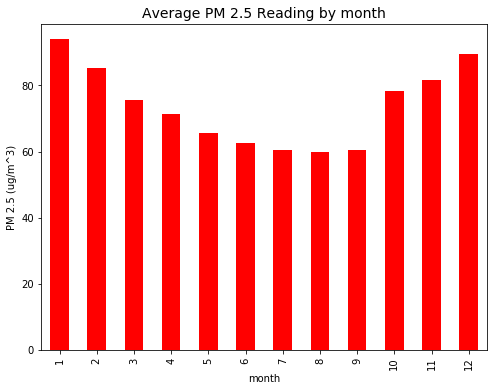

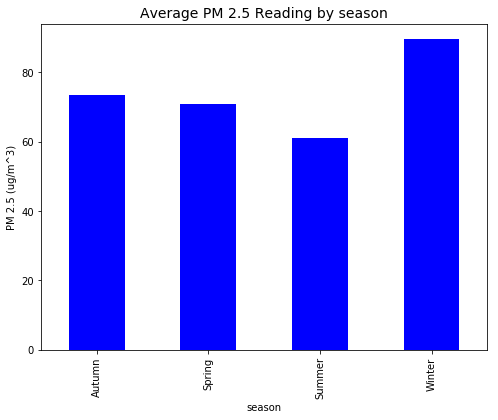

In [30]:
univariate_plot(df_all_cities, 'month', 'red')
univariate_plot(df_all_cities, 'season', 'blue')

Text(0,0.5,'PM2.5 level')

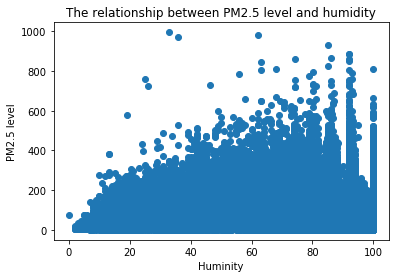

In [31]:
X1=df_all_cities['HUMI']
X2=df_all_cities['TEMP']
Y=df_all_cities['PM_US_Post']

plt.scatter(X1,Y)
plt.title('The relationship between PM2.5 level and humidity')
plt.xlabel('Huminity')
plt.ylabel('PM2.5 level')



Text(0,0.5,'PM2.5 level')

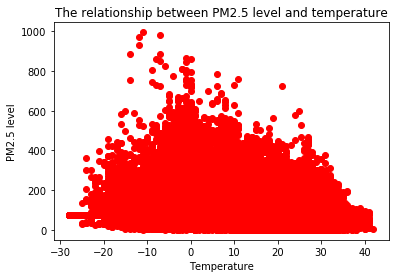

In [32]:
plt.scatter(X2,Y,color='r')
plt.title('The relationship between PM2.5 level and temperature')
plt.xlabel('Temperature')
plt.ylabel('PM2.5 level')

In [33]:
df_all_cities['PRES'].skew()

0.18334633188007254

In [34]:
df_all_cities['PRES'].kurt()

-0.6247327010479493

In [35]:
pm = df_all_cities

In [36]:
pm.head()

,year,month,day,hour,season,PM_US_Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,city
0,2010,1,1,0,Winter,73.684172,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0,Beijing
1,2010,1,1,1,Winter,73.684172,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0,Beijing
2,2010,1,1,2,Winter,73.684172,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0,Beijing
3,2010,1,1,3,Winter,73.684172,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0,Beijing
4,2010,1,1,4,Winter,73.684172,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0,Beijing


In [37]:
spring=pm[(pm["season"]=='Spring')]

In [38]:
spring.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66240 entries, 1416 to 47447
Data columns (total 15 columns):
year             66240 non-null int64
month            66240 non-null int64
day              66240 non-null int64
hour             66240 non-null int64
season           66240 non-null object
PM_US_Post       66240 non-null float64
DEWP             65524 non-null float64
HUMI             66240 non-null float64
PRES             65527 non-null float64
TEMP             66240 non-null float64
cbwd             65527 non-null object
Iws              65521 non-null float64
precipitation    61209 non-null float64
Iprec            61209 non-null float64
city             66240 non-null object
dtypes: float64(8), int64(4), object(3)
memory usage: 7.3+ MB


In [39]:
gp1=spring.groupby(['year','city'])['PM_US_Post']

In [40]:
gp1.size()

year  city     
2010  Beijing      2208
      Chengdu      2208
      Guangzhou    2208
      Shanghai     2208
      Shenyang     2208
2011  Beijing      2208
      Chengdu      2208
      Guangzhou    2208
      Shanghai     2208
      Shenyang     2208
2012  Beijing      2208
      Chengdu      2208
      Guangzhou    2208
      Shanghai     2208
      Shenyang     2208
2013  Beijing      2208
      Chengdu      2208
      Guangzhou    2208
      Shanghai     2208
      Shenyang     2208
2014  Beijing      2208
      Chengdu      2208
      Guangzhou    2208
      Shanghai     2208
      Shenyang     2208
2015  Beijing      2208
      Chengdu      2208
      Guangzhou    2208
      Shanghai     2208
      Shenyang     2208
Name: PM_US_Post, dtype: int64

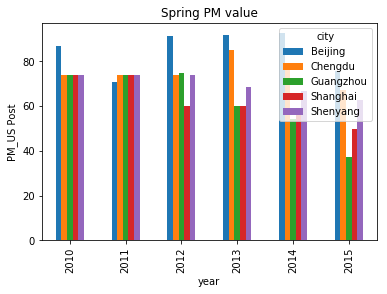

In [41]:
gpa1=gp1.mean()
gpa1=gpa1.unstack()
gpa1.plot(kind='bar',figsize=(6,4))
plt.title('Spring PM value')
plt.xlabel('year')
plt.ylabel('PM_US Post')
plt.show()

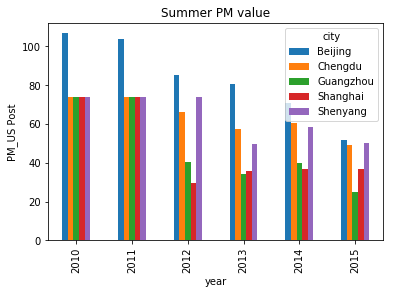

In [42]:
summer=pm[(pm["season"]=='Summer')]
gp2=summer.groupby(['year','city'])['PM_US_Post']
gp2.size()
gpa2=gp2.mean()
gpa2=gpa2.unstack()
gpa2.plot(kind='bar',figsize=(6,4))
plt.title('Summer PM value')
plt.xlabel('year')
plt.ylabel('PM_US Post')
plt.show()

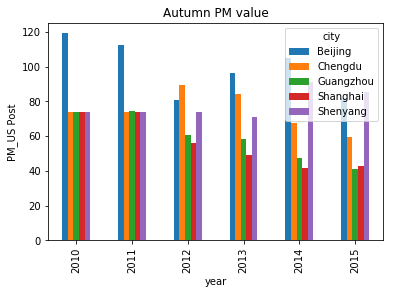

In [43]:
autumn=pm[(pm["season"]=='Autumn')]
gp3=autumn.groupby(['year','city'])['PM_US_Post']
gp3.size()
gpa3=gp3.mean()
gpa3=gpa3.unstack()
gpa3.plot(kind='bar',figsize=(6,4))
plt.title('Autumn PM value')
plt.xlabel('year')
plt.ylabel('PM_US Post')
plt.show()

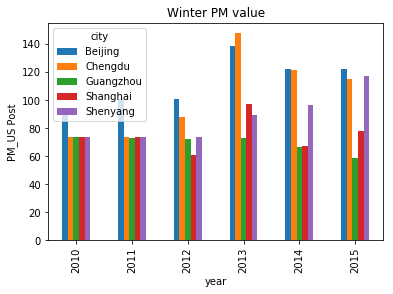

In [44]:
winter=pm[(pm["season"]=='Winter')]
gp4=winter.groupby(['year','city'])['PM_US_Post']
gp4.size()
gpa4=gp4.mean()
gpa4=gpa4.unstack()
gpa4.plot(kind='bar',figsize=(6,4))
plt.title('Winter PM value')
plt.xlabel('year')
plt.ylabel('PM_US Post')
plt.show()

In [45]:
mypivot=pd.pivot_table(pm,index=['city'],values=['PM_US_Post'],columns=['cbwd'],aggfunc=[np.mean])


In [46]:
mypivot

mean                                              
          PM_US_Post                                              
cbwd              NE         NW          SE         SW          cv
city                                                              
Beijing    87.008492  64.125934  108.176435        NaN  123.362894
Chengdu    69.731847  77.952400   71.941039  74.927537   84.748852
Guangzhou  59.738423  62.681801   56.582022  53.895084   65.496957
Shanghai   53.828037  75.689555   53.732045  67.524889   73.396984
Shenyang   81.586752  65.586047   79.972043  70.436896   82.512009

In [47]:
pm2=pm[['PM_US_Post','DEWP','HUMI','PRES','TEMP','Iws','precipitation','Iprec']]
pm2.corr()

,PM_US_Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
PM_US_Post,1.000000,-0.119579,0.112014,0.154958,-0.210618,-0.140736,-0.002121,-0.002263
DEWP,-0.119579,1.000000,0.538339,-0.775015,0.881182,-0.104289,-0.001670,-0.001466
HUMI,0.112014,0.538339,1.000000,-0.253226,0.092183,-0.132987,0.000059,0.000384
PRES,0.154958,-0.775015,-0.253226,1.000000,-0.787103,0.101755,-0.088319,-0.089149
TEMP,-0.210618,0.881182,0.092183,-0.787103,1.000000,-0.048314,-0.002307,-0.002224
Iws,-0.140736,-0.104289,-0.132987,0.101755,-0.048314,1.000000,-0.000689,-0.000620
precipitation,-0.002121,-0.001670,0.000059,-0.088319,-0.002307,-0.000689,1.000000,0.999997
Iprec,-0.002263,-0.001466,0.000384,-0.089149,-0.002224,-0.000620,0.999997,1.000000


In [64]:
pm3=pm[['season','PM_US_Post','TEMP','cbwd','Iws','city']]
pm4=pd.get_dummies(pm3,columns=['season','cbwd','city'])

In [65]:
pm4[np.isnan(pm4)] = 0
pm4[np.isinf(pm4)] = 0

In [66]:
train=pm4.sample(frac=0.7)

In [67]:
test=pm4[~pm4.index.isin(train.index)]

In [68]:
xtrain,ytrain=train.drop('PM_US_Post',axis=1),train['PM_US_Post']

In [69]:
xtest,ytest=test.drop('PM_US_Post',axis=1),test['PM_US_Post']

In [70]:
import statsmodels.api as sm

In [71]:
xtrain=sm.add_constant(xtrain)

In [72]:
xtest=sm.add_constant(xtest)

In [61]:
results=sm.OLS(ytrain,xtrain).fit()

In [73]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             PM_US_Post   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     1766.
Date:                Sat, 26 Dec 2020   Prob (F-statistic):               0.00
Time:                        03:06:48   Log-Likelihood:            -9.8476e+05
No. Observations:              184030   AIC:                         1.970e+06
Df Residuals:                  184013   BIC:                         1.970e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3981.3641    124.820     31.

In [74]:
from sklearn.linear_model import Ridge,RidgeCV

In [75]:
import numpy as np
lambdas = np.logspace(-5,2,200)

In [76]:
ridge_cv = RidgeCV(alphas=lambdas,normalize=True,scoring="neg_mean_squared_error",cv=10)
ridge_cv.fit(xtrain,ytrain)

RidgeCV(alphas=array([1.00000e-05, 1.08437e-05, ..., 9.22198e+01, 1.00000e+02]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=True,
    scoring='neg_mean_squared_error', store_cv_values=False)

In [77]:
ridge_cv.alpha_

0.0013987131026472386

In [78]:
model=Ridge(alpha=ridge_cv.alpha_,normalize=False)
model.fit(xtrain,ytrain)
ridge_pre = model.predict(xtest)

In [79]:
from sklearn.metrics import mean_squared_error,r2_score
mean_squared_error(ytest,ridge_pre)

3202.331347613505

In [80]:
r2_score(ytest,ridge_pre)

0.12780674163228412